In [1]:
import pandas as pd
import pyreadr 
import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt
import matplotlib.lines as lines

In [28]:
# Read in data
d = pd.read_csv('../mats/raw_data.csv', index_col=0)
# d = pyreadr.read_r('./raw_data.rds')[None]

In [36]:
# Save easy descriptives 
desc_df = d.describe(percentiles=[.05, .25, .5, .75, .95])
desc_df.to_csv('../mats/descdf.csv')

In [3]:
# Create a dictionary with more complex descriptive values
# desc = {}

# for var in list(d.columns)[1:]:

#     summary = pd.DataFrame(d[var].describe(percentiles=[.05, .25, .5, .75, .95])).T
    
#     v_count = pd.DataFrame([d[var].value_counts(normalize=False, dropna=False), # value count (with NA)
#                       d[var].value_counts(normalize=True, dropna=False),  # percentage (with NA and without)
#                       d[var].value_counts(normalize=True, dropna=True)], 
#                      index=['count','prop_NA','prop_noNA']).T.sort_index()
#     v_count = v_count.iloc[:-1] # remove duplicated NA row
#     v_count.fillna('null') # json does not encode NaN
    
#     density = pd.DataFrame()
#     # Continuos variables: add pdf
#     if v_count.shape[0] > 10:
#         # v_count = v_count.iloc[:-1] # revove other NA row
#         # create smooth curve for desnsity
#         # v_count['smooth'] = signal.savgol_filter(v_count['count'], v_count.shape[0]//2, 3) # window and order of fitted polynomial
        
#         x = d[var].dropna()
#         density['x'] = np.linspace(min(x), max(x), len(x))
#         density['dens'] = sum(norm(i).pdf(density['x']) for i in x) # this one takes a sec to run 
        
#     desc[var] = [summary.to_dict('records') , v_count.to_dict('records'), density.to_dict('records')]
#     # Status
#     # print(var)


In [4]:
# import json

# with open('../mats/descrip.json', 'w') as f:
#     json.dump(desc, f)


In [35]:
d = pd.read_csv('../mats/descdf.csv', index_col=0)
d

,sex,mDEP01_9.6y,mDEP02_9.6y,mDEP03_9.6y,mDEP04_9.6y,mDEP05_9.6y,mDEP06_9.6y,mDEP07_9.6y,mDEP08_9.6y,mDEP09_9.6y,...,glucose_24.5y,CRP_24.5y,alcohol_24.5y,smoking_24.5y,canabis_24.5y,CMR_age_24.5y,BMI_24.5y,FMI_24.5y,TFI_24.5y,LMI_24.5y
count,15039.000000,8073.000000,8060.000000,8067.000000,8062.000000,8053.000000,8059.000000,8062.000000,8058.000000,8053.000000,...,3254.000000,3016.000000,4151.000000,1179.000000,1165.000000,4020.000000,3974.000000,3852.000000,3852.000000,3852.000000
mean,1.488596,0.602007,0.154094,0.234164,0.323989,0.144294,0.133143,0.215207,0.077811,0.060226,...,5.296884,2.282152,6.997591,29.067854,0.299571,24.484100,24.901685,8.071106,3.873719,15.936085
std,0.499887,0.596514,0.396131,0.466410,0.526407,0.388664,0.373172,0.452373,0.294379,0.256023,...,0.678985,6.516730,4.878227,39.154417,0.898858,0.814934,5.012065,3.865213,2.170947,2.180315
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.530000,0.100000,0.000000,0.000000,0.000000,22.416667,13.677715,0.627744,0.170635,0.787836
5%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.510000,0.160000,0.000000,0.000000,0.000000,23.166667,19.012189,3.490578,1.444255,12.899150
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.940000,0.390000,4.000000,0.000000,0.000000,23.916667,21.501419,5.422186,2.372966,14.338614
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.250000,0.850000,6.000000,10.000000,0.000000,24.500000,23.791556,7.158595,3.339170,15.642569
75%,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.587500,2.250000,10.000000,50.000000,0.000000,25.083333,27.026740,9.732571,4.764498,17.258614
95%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.133500,8.427500,16.000000,105.000000,2.000000,25.916667,34.977366,15.982377,8.325282,19.863307
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,22.150000,224.720000,40.000000,300.000000,6.000000,26.500000,54.166069,28.491934,16.692992,26.601813


In [39]:
age_desc = d[list(d.columns[d.columns.str.contains('age')])]
age_desc

,mDEP_age_9.6y,CMR_age_9.6y,CMR_age_9.8y,sDEP_age_10.6y,CMR_age_10.6y,CMR_age_10.7y,mDEP_age_11.7y,CMR_age_11.8y,sDEP_age_12.8y,CMR_age_12.8y,...,mDEP_age_16.7y,CMR_age_16y,CMR_age_17y,sDEP_age_17.8y,CMR_age_17.8y,sDEP_age_18.7y,sDEP_age_21.9y,sDEP_age_22.9y,sDEP_age_23.8y,CMR_age_24.5y
count,8221.000000,7014.000000,7722.000000,7557.000000,7557.000000,6641.000000,7478.000000,7153.000000,6832.000000,6832.000000,...,5720.000000,4755.000000,4366.000000,4500.000000,5217.000000,3372.000000,3459.000000,4022.000000,4078.000000,4020.000000
mean,9.651320,9.651899,9.874471,10.648042,10.648042,10.720913,11.718407,11.747484,12.811036,12.811036,...,16.838228,16.100754,17.041151,17.840812,17.823877,18.649689,21.950684,22.905157,23.874591,24.484100
std,0.130710,0.138038,0.323869,0.264646,0.264646,0.138181,0.136803,0.238673,0.231298,0.231298,...,0.360852,0.148715,0.092596,0.394972,0.455499,0.491429,0.523168,0.531662,0.519411,0.814934
min,9.500000,9.500000,8.750000,9.833333,9.833333,10.500000,11.416667,10.416667,11.333333,11.333333,...,16.500000,15.916667,16.500000,16.298426,16.250000,17.833333,20.916667,21.891855,22.833333,22.416667
5%,9.583333,9.583333,9.500000,10.333333,10.333333,10.666667,11.666667,11.500000,12.500000,12.500000,...,16.500000,16.000000,17.000000,17.368925,17.333333,17.916667,21.166667,22.100068,23.083333,23.166667
25%,9.583333,9.583333,9.666667,10.500000,10.500000,10.666667,11.666667,11.583333,12.666667,12.666667,...,16.500000,16.000000,17.000000,17.604381,17.583333,18.250000,21.500000,22.472279,23.416667,23.916667
50%,9.583333,9.583333,9.833333,10.583333,10.583333,10.666667,11.666667,11.750000,12.833333,12.833333,...,16.666667,16.000000,17.000000,17.768652,17.750000,18.666667,21.916667,22.881588,23.833333,24.500000
75%,9.666667,9.666667,10.000000,10.750000,10.750000,10.750000,11.750000,11.833333,12.916667,12.916667,...,17.083333,16.166667,17.083333,17.987680,17.916667,19.083333,22.416667,23.326489,24.333333,25.083333
95%,9.916667,9.916667,10.500000,11.166667,11.166667,10.916667,11.916667,12.166667,13.250000,13.250000,...,17.500000,16.416667,17.229167,18.631211,18.833333,19.416667,22.750000,23.734428,24.666667,25.916667
max,11.000000,11.416667,11.666667,12.250000,12.250000,14.666667,13.833333,13.583333,14.250000,14.250000,...,18.333333,17.583333,18.166667,19.885010,20.000000,20.083333,23.250000,24.635181,25.250000,26.500000


In [40]:

dep_names = ['Felt miserable or unhappy',
             'Didn\'t enjoy anything at all',
             'Felt so tired they just sat around and did nothing',
             'Was very restless',
             'Felt they were no good any more',
             'Cried a lot',
             'Found it hard to think properly or concentrate',
             'Hated themselves',
             'Felt they were a bad person',
             'Felt lonely',
             'Thought nobody really loved them',
             'Thought they would never be as good as other people',
             'Felt they did everything wrong']

cmr_labels = {'height':'Height',
              'weight':'Weight',
              'BMI':'Body mass index',
              'waist_circ':'Waist circumference',
              'waist_hip_ratio':'Waist/hip ratio',
              'total_fatmass':'Total fat mass',
              'total_leanmass':'Total lean mass',
              'trunk_fatmass':'Trunk fat mass',
              'android_fatmass':'Android fat mass',
              'liver_fat':'Liver fat',
              'SBP':'Systolic blood pressure',
              'DBP':'Diastolic blood pressure',
              'PWV':'Pulse wave velocity',
              'IMT':'Intima-media thickness',
              'heart_rate':'Heart rate',
              'LVM':'Left ventricular mass',
              'RWT':'Relative wall thickness',
              'FS':'Fractional shortening',
              'tot_chol':'Total cholesterol',
              'HDL_chol':'HDL-cholesterol',
              'LDL_chol':'LDL-cholesterol',
              'insulin':'Insulin',
              'triglyc':'Triglycerides',
              'glucose':'Glucose',
              'CRP':'C-reactive protein',
              'IL_6':'Interleaukin-6'}

In [7]:
dep = d[list(d.columns[d.columns.str.contains('DEP')])]
cmr = d[list(d.columns[d.columns.str.contains('CMR')])]

In [8]:
def cmr_meas(age):
    t = d[list(d.columns[d.columns.str.contains(age) & ~(d.columns.str.contains('DEP|age'))])]
    s = [x.split('_'+age)[0] for x in t.columns]
    return(s)
def dep_meas(age):
    t = d[list(d.columns[d.columns.str.contains(age) & d.columns.str.contains('DEP') & ~(d.columns.str.contains('score|age'))])]
    s = [x.split('_'+age)[0][1:] for x in t.columns]
    return(s)
def get_age(list_ages): 
    return( cmr.loc['50%', cmr.columns.str.contains('|'.join(list_ages))])

In [231]:
labels = {'DEP01':'Felt miserable or unhappy',
          'DEP02':'Didn\'t enjoy anything at all',
          'DEP03':'Felt so tired they just sat around and did nothing',
          'DEP04':'Was very restless',
          'DEP05':'Felt they were no good any more',
          'DEP06':'Cried a lot',
          'DEP07':'Found it hard to think properly or concentrate',
          'DEP08':'Hated themselves',
          'DEP09':'Felt they were a bad person',
          'DEP10':'Felt lonely',
          'DEP11':'Thought nobody really loved them',
          'DEP12':'Thought they would never be as good as other people',
          'DEP13':'Felt they did everything wrong',
          'DEP_score':'Total depression score',
          'height':'Height',
          'weight':'Weight',
          'BMI':'Body mass index',
          'waist_circ':'Waist circumference',
          'waist_hip_ratio':'Waist/hip ratio',
          'total_fatmass':'Total fat mass',
          'total_leanmass':'Total lean mass',
          'trunk_fatmass':'Trunk fat mass',
          'android_fatmass':'Android fat mass',
          'FMI':'Fat mass index',
          'LMI':'Lean mass index',
          'TFI':'Trunk fat mass index',
          'liver_fat':'Liver fat',
          'SBP':'Systolic blood pressure',
          'DBP':'Diastolic blood pressure',
          'PWV':'Pulse wave velocity',
          'IMT':'Intima-media thickness',
          'heart_rate':'Heart rate',
          'LVM':'Left ventricular mass',
          'RWT':'Relative wall thickness',
          'FS':'Fractional shortening',
          'tot_chol':'Total cholesterol',
          'HDL_chol':'HDL-cholesterol',
          'LDL_chol':'LDL-cholesterol',
          'insulin':'Insulin',
          'triglyc':'Triglycerides',
          'glucose':'Glucose',
          'CRP':'C-reactive protein',
          'IL_6':'Interleaukin-6',
          'alcohol':'Alcohol consumption',
          'canabis':'Cannabis consumption',
          'smoking':'Smoking (tobacco)'
         }

In [278]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# need age_desc from descdf and list of labels ()
def plot_overview(width=1500, height=800):
    fig = make_subplots(2,1, vertical_spacing=0.05, row_heights=[13*2, 25*2])

    colors = {'sDEP':'71, 107, 237', 'mDEP':'148, 103, 189','CMR':'214, 39, 40'}
    
    def scat(vartype):
        # Get ages of measurement from age_desc 
        df = age_desc[list(age_desc.columns[age_desc.columns.str.contains(vartype)])]
        
        if vartype=='CMR':
            # Extract variable names from labels (only keeping those of interest)
            cmrkeys = [i for i in list(labels.keys())[14:] if i not in ['BMI','FMI','LMI','TFI','alcohol','canabis','smoking']]
        
            cmrlab = {k:labels[k] for k in cmrkeys if k in labels}
            cmrlab['weight'] = 'Weight / BMI'
            cmrlab['total_fatmass'] = 'Total fat mass / FMI'
            cmrlab['total_leanmass'] = 'Total lean mass / LMI'
            
            names = list(cmrlab.values())
        else:
            names = list(labels.values())[0:13]
            
        x, y = [i.flatten() for i in np.meshgrid(df.loc['50%'], names)]
        x_min,_ = np.meshgrid(df.loc['5%'], names)
        x_max,_ = np.meshgrid(df.loc['95%'], names)
    
        if vartype=='CMR': 
            ages = [i[-1][:-1] for i in df.columns.str.split('_')]
    
            cmrmat = pd.DataFrame(columns=ages, index=cmrlab.keys())
    
            for age in ages:
                t = d[list(d.columns[d.columns.str.contains(age) & ~(d.columns.str.contains('DEP|age'))])]
                meas = [x.split('_'+age)[0] for x in t.columns if x.split('_'+age)[0] not in ['BMI','FMI','LMI','TFI','alcohol','canabis','smoking']]
                
                cmrmat.loc[meas, age] = [cmrlab[m] for m in meas]
                
            y = list(cmrmat.stack(future_stack=True))
        
        p = go.Scatter(x = x, y = y, mode='markers',
                       marker = dict(size = 10, symbol = 'square', color=f'rgb({colors[vartype]})', opacity = .9),
                       error_x = dict(type='data', symmetric=False,
                                      array= x_max.flatten() - x,
                                      arrayminus= x - x_min.flatten(),
                                      color=f'rgba({colors[vartype]}, 0.3)', # use this for opacity 
                                      thickness=10, width=0),
                       name = vartype
                      )
                           # name = fullname, text = [f'{shortname} {n}' for n in range(1,len(t)+1)],
                           # marker = dict(size = 10, symbol = 'square',opacity = .8), opacity = .7,
                           # hovertemplate = """ <b>%{text}</b> <br> Median: %{y:.2f} <br> Timepoint: %{x} years <br><extra></extra>""")
        return p
    
    fig.add_trace(scat('sDEP'), 1,1)
    fig.add_trace(scat('mDEP'), 1,1)
    fig.add_trace(scat('CMR'), 2,1)
    
    cmrgroups = {'Anthropometry':[4,'lightblue'], 
                 'Fat distribution':[5,'yellow'], 
                 'Arteries':[4,'orange'], 
                 'Heart':[4,'red'], 
                 'Blood-based    <br>metabolic    <br>markers':[6,'brown'], 
                 'Inflammation':[2,'blue']}
    
    cmrgrouplabels = []; y0 = -0.5
    
    for g in cmrgroups:
        y1 = y0 + cmrgroups[g][0]
        cmrgrouplabels.append(dict(x0 = -0.15, x1 = -0.155, xref='paper',
                              y0 = y0, y1 = y1-0.25, yref='y2', 
                              type='rect', fillcolor=cmrgroups[g][1], opacity=.3, line_width=0,
                              label=dict(text=f'<b>{g}    </b>', textposition='top right', padding=2)
        ))
        y0 = y1 + 0.05
        
    
    fig.update_xaxes(range=[9,26], mirror=True, ticks='outside',linecolor='black', gridcolor='lightgrey', 
                     tickmode = 'linear',tick0 = 9, dtick = 1)
    
    fig.update_yaxes( mirror=True, ticks='inside',linecolor='black') # autorange='reversed',
    
    fig.update_layout(autosize=False, width=width, height=height,
                      yaxis1 = dict(range=(12.7, -0.7)), yaxis2 = dict(range=(24.7,-0.7),), xaxis2= dict(title='Child age (years)'),
                      shapes=cmrgrouplabels, plot_bgcolor='white', margin=dict(l=20, r=20, t=20, b=20))
    
    return fig



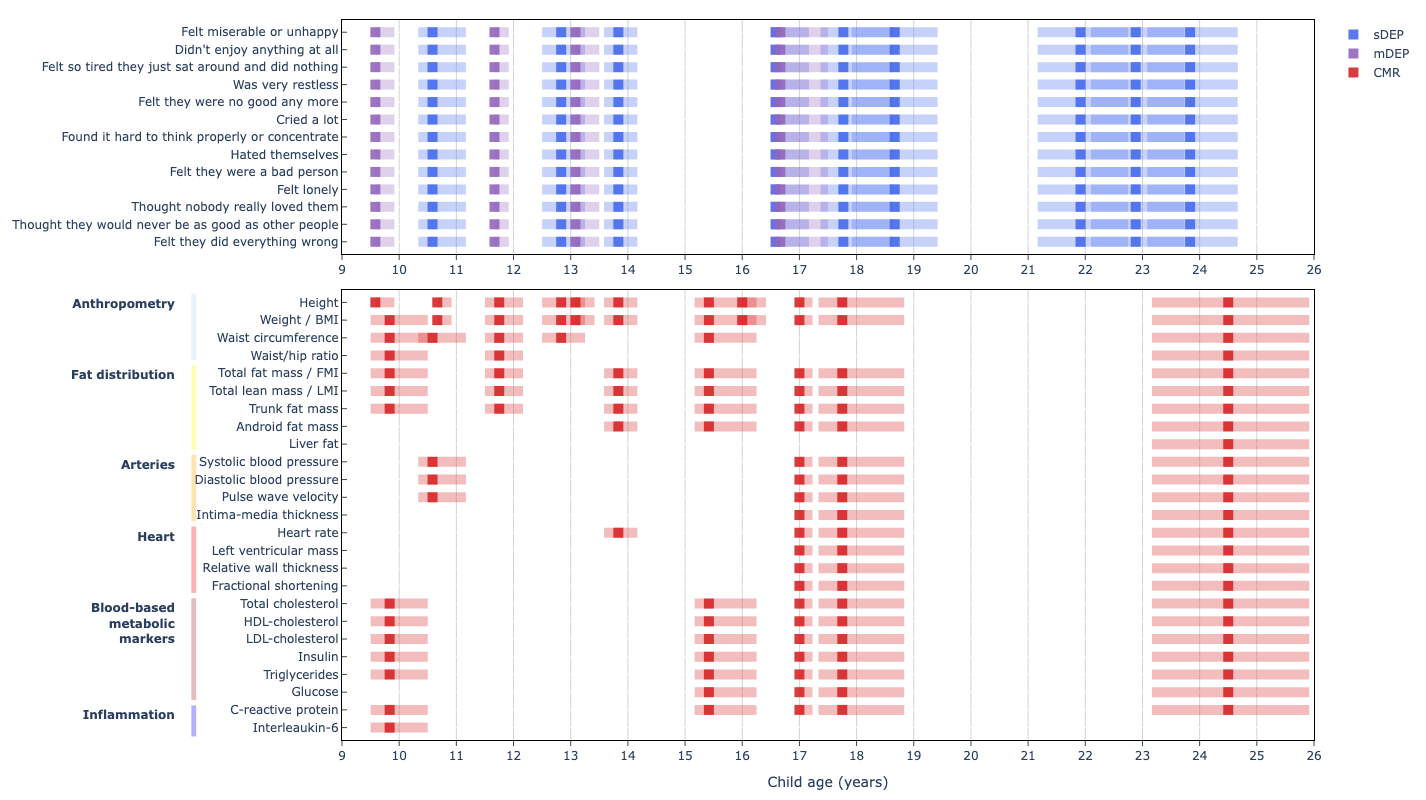

In [279]:
plot_overview()

### Figure 1

In [ ]:
fig, axs = plt.subplot_mosaic('Ax;Bx', figsize=(20,14), width_ratios=[10,1],
                              height_ratios=[len(dep_names),len(cmr_labels)], layout='constrained')

plt.rcParams["font.family"] = "Arial"

def plot_age(ax, dset_name):
    if dset_name=='dep': 
        label_order = ['DEP'+str(x).zfill(2) for x in range(1,14)]
    else:
        label_order = cmr_labels.keys()
    
    # Set up order of labels 
    ax.plot([9.55]*len(label_order), label_order, ' ', ms=1)
    # Add background grid 
    ax.xaxis.grid(True)
    for y in [i-0.5 for i in range(0, len(label_order), 2)]:
        ax.axhspan(y, y+1, facecolor='grey', alpha=0.1)
    
    dset = globals()[dset_name]
    
    for c in dset.columns:
        age = str(round(dset.loc['50%',c],1))
        if dset_name=='dep': 
            lbls = [x for x in label_order if x in dep_meas(age)]
            col = 'mediumblue'if 'sDEP' in c else 'mediumorchid'
            names = dep_names
        else:
            lbls = [x for x in cmr_labels if x in cmr_meas(age)]
            col = 'crimson'; names = list(cmr_labels.values())
        # Plot median age
        ax.plot([dset.loc['50%',c]]*len(lbls), lbls, 's', ms=10, color=col)
        # Plot interquartile range 
        ax.fill_betweenx(lbls, dset.loc['25%',c], dset.loc['75%',c], color=col, alpha=0.1)
    
    # Add self-reported height and weight 
    if dset_name=='cmr': 
        ax.plot(get_age(['9.6','10.7','11.8','16y','17y']), ['height']*5, 's', ms=10, color='darkred')
        ax.plot(get_age(['10.7','16y','17y']), ['weight']*3, 's', ms=10, color='darkred')
    
    # Adjust ranges 
    ax.set(xlim=(8.8,25.2),ylim=(-1,len(label_order)+0.05))
    # Set x axis ticks every 1 year 
    ax.set_xticks(range(9,26)); ax.set_xticklabels(range(9,26), fontsize=15)
    if dset_name=='cmr': ax.set_xlabel('Participant age (years)', fontsize=16, fontweight='bold', labelpad=7)
    # Add readable y labels
    ax.set_yticklabels(names, fontsize=15)
    # Order axis
    ax.invert_yaxis()
    
plot_age(axs['A'], 'dep')
plot_age(axs['B'], 'cmr')

# Add legend -----------------------------------------------------------------------
labs = ['Depression\nsymptom\n(self-report)','Depression\nsymptom\n(parent-report)',
        'Cardio-metabolic\nmarker\n(measured)','Cardio-metabolic\nmarker\n(reported)']
for i, c in enumerate(['mediumblue','mediumorchid','crimson','darkred']):
    p = i if i<2 else i+3.5
    axs['x'].plot(1, p, 's', ms=10, color=c)
    axs['x'].text(3, p, labs[i], fontsize=15, va='center')
    
axs['x'].set_axis_off()
axs['x'].set(xlim=(0,10),ylim=[-1,15])
axs['x'].invert_yaxis()

def markcmr(end,start, col, label):
    fig.add_artist(lines.Line2D([.15]*2, [start,end],  lw=5., color=col, alpha=0.4))
    fig.text(.14, (end+start)/2, label, ha='right',va='center', fontsize=15, fontweight='bold')
    
markcmr(.595,.535, 'lightblue','Anthropometry')
markcmr(.525,.425, 'yellow','Fat distribution')
markcmr(.415,.330, 'orange','Arteries')
markcmr(.320,.240, 'red',  'Heart')
markcmr(.230,.110, 'brown','Blood-based\nmetabolic\nmarkers')
markcmr(.100,.060, 'blue','Inflammation')


fig.savefig('assets/timeline.pdf', dpi=400)
fig.savefig('assets/timeline.png', dpi=70, bbox_inches='tight')

In [ ]:
fig, axs = plt.subplot_mosaic('A;B', figsize=(20,5))

dep = d[list(d.columns[d.columns.str.contains('DEP_score')])]
cmr = d[list(d.columns[~d.columns.str.contains('DEP|sex|age|smoking|canabis|alcohol')])]

axs['A'].plot([9.6,10.6,11.7,12.8,13.1,13.8,16.6,16.7,17.8,18.7,21.9,22.9,23.8],dep.describe().loc['count'], '-o')
axs['B'].plot(cmr.describe().loc['count'], '-o')

axs['B'].tick_params(axis='x', labelrotation = 90)
axs['B'].set_xlim(-1,cmr.shape[1]-1);

axs['A'].set_ylim(500, 8400);axs['B'].set_ylim(500, 8500);

fig.savefig('assets/samplesizes.pdf', dpi=400)
fig.savefig('assets/samplesizes.png', dpi=70, bbox_inches='tight')

In [ ]:
cs = d.describe().loc['count'].sort_values()

In [ ]:
cs.tail(30)